In [1]:
#Gender

import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
s = json.load( open(os.getenv('PUI2015')+'pui_plot.json') )
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\Users\Alan\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#splitting data:

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

# print allmales['all']['Total with Income']

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [3]:
#Exploring:
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [4]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

c:\Users\Alan\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#For females:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

c:\Users\Alan\Anaconda\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


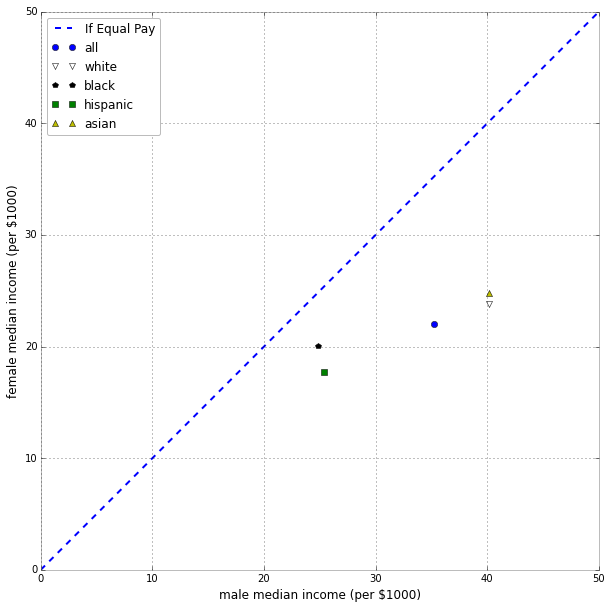

In [6]:
#Plotting the same:

x = range(75)
y = range(75)
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b--', lw=2, label='If Equal Pay')
ax.plot(allmales['all']['Median income'][1]/1000, allfemales['all']['Median income'][1]/1000, 'ob', label='all')
ax.plot(allmales['white']['Median income'][1]/1000, allfemales['white']['Median income'][1]/1000, 'vw', label='white')
ax.plot(allmales['black']['Median income'][1]/1000, allfemales['black']['Median income'][1]/1000, 'pk', label='black')
ax.plot(allmales['hispanic']['Median income'][1]/1000, allfemales['hispanic']['Median income'][1]/1000, 'sg', label='hispanic')
ax.plot(allmales['asian']['Median income'][1]/1000, allfemales['asian']['Median income'][1]/1000, '^y', label='asian')
ax.set_xlabel('male median income (per $1000)')
ax.set_ylabel('female median income (per $1000)')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.legend(loc='best')

The Graph shows that for every race, women get paid less than men, with the greatest deviation from the 'equality line' coming for white women based on total median income

In [7]:
MaleMedianIncome = []
MaleMedianIncome = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], 
     allmales['black']['Median income'][1], allmales['asian']['Median income'][1], allmales['hispanic']['Median income'][1]]
FemaleMedianIncome = []
FemaleMedianIncome = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], 
    allfemales['black']['Median income'][1], allfemales['asian']['Median income'][1], allfemales['hispanic']['Median income'][1]]

print MaleMedianIncome
print FemaleMedianIncome 

[35228.0, 40122.0, 24855.0, 40153.0, 25411.0]
[22063.0, 23780.0, 20044.0, 24840.0, 17762.0]


In [8]:
#Linear regression
import statsmodels.api as smf
males = smf.add_constant(MaleMedianIncome)
model1=smf.OLS(FemaleMedianIncome, males)
results1=model1.fit()
print results1.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Tue, 20 Oct 2015   Prob (F-statistic):             0.0176
Time:                        08:12:08   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

c:\Users\Alan\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [9]:
#Analytical regression
import scipy.stats as stats
correlationCoefficient = stats.spearmanr(MaleMedianIncome, FemaleMedianIncome)
std(MaleMedianIncome)/std(FemaleMedianIncome)
beta1=correlationCoefficient[0]*std(FemaleMedianIncome)/std(MaleMedianIncome)
beta0=mean(FemaleMedianIncome)-beta1*mean(MaleMedianIncome)

In [10]:
#Combining data
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values, allmales['white']['Median income'][:].values, 
                                      allmales['black']['Median income'][:].values,
                                      allmales['hispanic']['Median income'][:].values,
                                      allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values, 
                                        allfemales['white']['Median income'][:].values, 
                                        allfemales['black']['Median income'][:].values,
                                        allfemales['hispanic']['Median income'][:].values, 
                                        allfemales['asian']['Median income'][:].values]).flatten())

#Applying mask
allMask = [np.isnan(all_males) + np.isnan(all_females)]
all_females.mask = allMask
all_males.mask = allMask

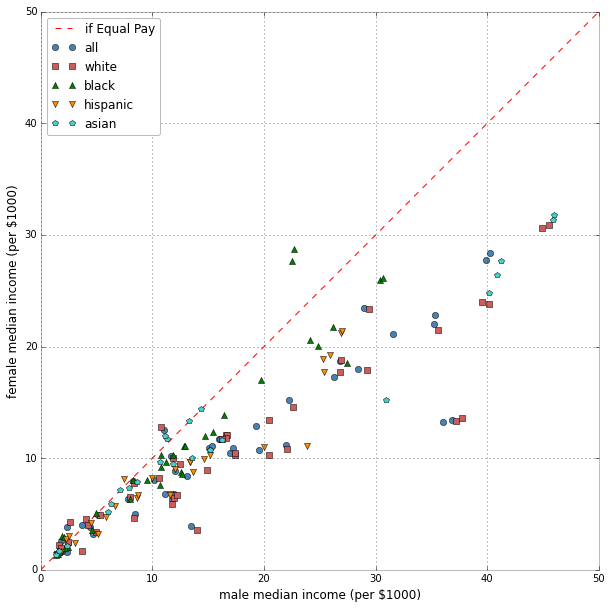

In [11]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r--', lw=1, label="if Equal Pay")
ax.plot(allmales['all']['Median income']/1000, allfemales['all']['Median income']/1000, 'o', label='all')
ax.plot(allmales['white']['Median income']/1000, allfemales['white']['Median income']/1000, 's', label='white')
ax.plot(allmales['black']['Median income']/1000, allfemales['black']['Median income']/1000, '^', label='black')
ax.plot(allmales['hispanic']['Median income']/1000, allfemales['hispanic']['Median income']/1000, 'v', label='hispanic')
ax.plot(allmales['asian']['Median income']/1000, allfemales['asian']['Median income']/1000, 'p', label='asian')
ax.set_xlabel('male median income (per $1000)')
ax.set_ylabel('female median income (per $1000)')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.legend(loc='best')